## flight price prediction

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_excel("D:\\New folder (2)\\Data_Train.xlsx")
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_df=pd.read_excel("D:\\New folder (2)\\Test_set.xlsx")

In [4]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Train Data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Handling Missing Values

In [6]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_df.dropna(inplace=True)

In [8]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Handling Numerical & Categorical Feature

In [9]:
train_df['Date']=train_df['Date_of_Journey'].str.split('/').str[0].astype(int)
train_df['Month']=train_df['Date_of_Journey'].str.split('/').str[1].astype(int)
train_df['year']=train_df['Date_of_Journey'].str.split('/').str[2].astype(int)

In [10]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Date             10682 non-null  int32 
 12  Month            10682 non-null  int32 
 13  year             10682 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.1+ MB


In [12]:
train_df['Arrival_hour']=pd.to_datetime(train_df['Arrival_Time']).dt.hour
train_df['Arrival_min']=pd.to_datetime(train_df['Arrival_Time']).dt.minute
train_df['Dep_hour']=pd.to_datetime(train_df['Dep_Time']).dt.hour
train_df['Dep_min']=pd.to_datetime(train_df['Dep_Time']).dt.minute

In [13]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [14]:
#assigning and converting duration columns into list
duration=list(train_df['Duration'])
         
for i in range(len(duration)):
    if len((duration[i]).split()) !=2:  ## check if the condition contains only hour or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m "   ## add 0 mins
        else:
            duration[i]=" 0h "+ duration[i]   ## add 0 hours
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))    ## extract hours from duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [15]:
train_df['Duration_hours']=duration_hours
train_df['Duration_mins']=duration_mins
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25


In [16]:
train_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,7,25


In [17]:
train_df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Route','Additional_Info'],axis=1, inplace=True)

In [18]:
numerical_features= ['Date','Month']

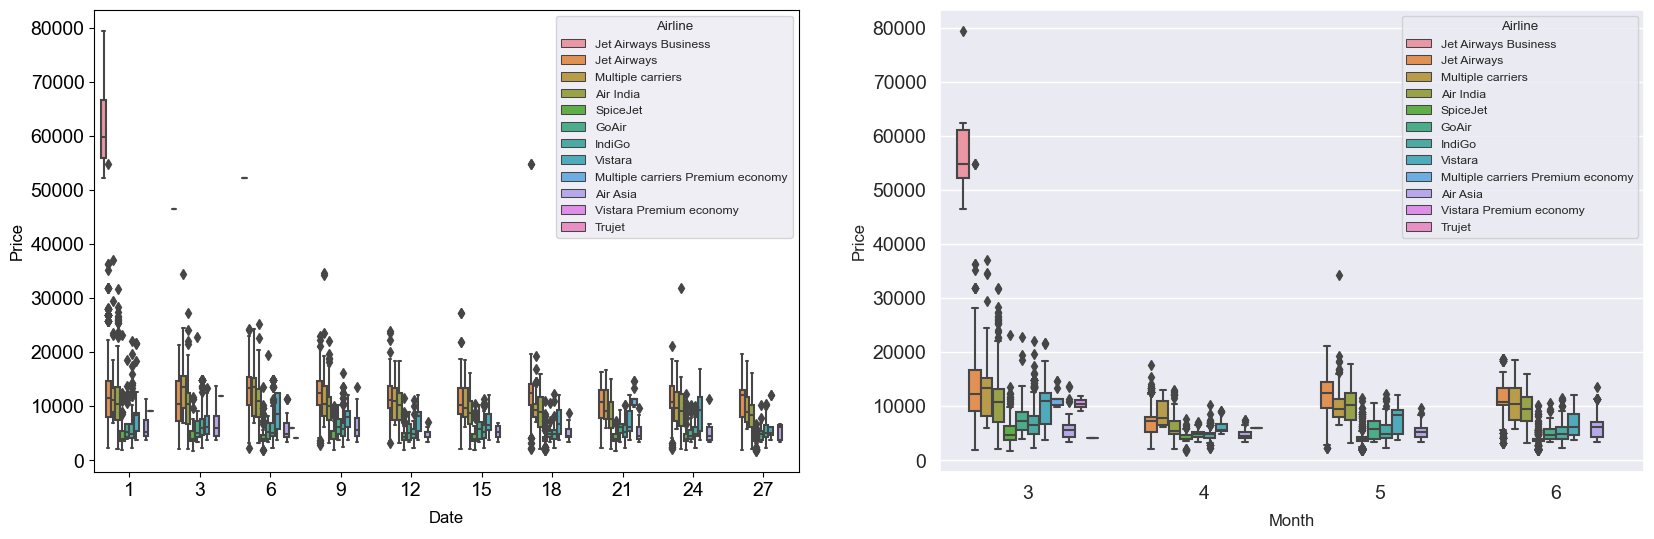

In [19]:
plt.figure(figsize=(20,15))
for i,col_name in enumerate(numerical_features):
    plt.subplot(len(numerical_features),2,i+1)
    sns.set(font_scale=0.8)
    sns.boxplot(data=train_df.sort_values('Price',ascending=False), x=col_name, y='Price',hue='Airline')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(col_name,labelpad=8, fontsize=12)
    plt.ylabel('Price',fontsize=12)
plt.subplots_adjust(hspace=0.5)

In [20]:
categorical_feature=[feature for feature in train_df.columns if train_df[feature].dtype == 'O']

In [21]:
categorical_feature

['Airline', 'Source', 'Destination', 'Total_Stops']

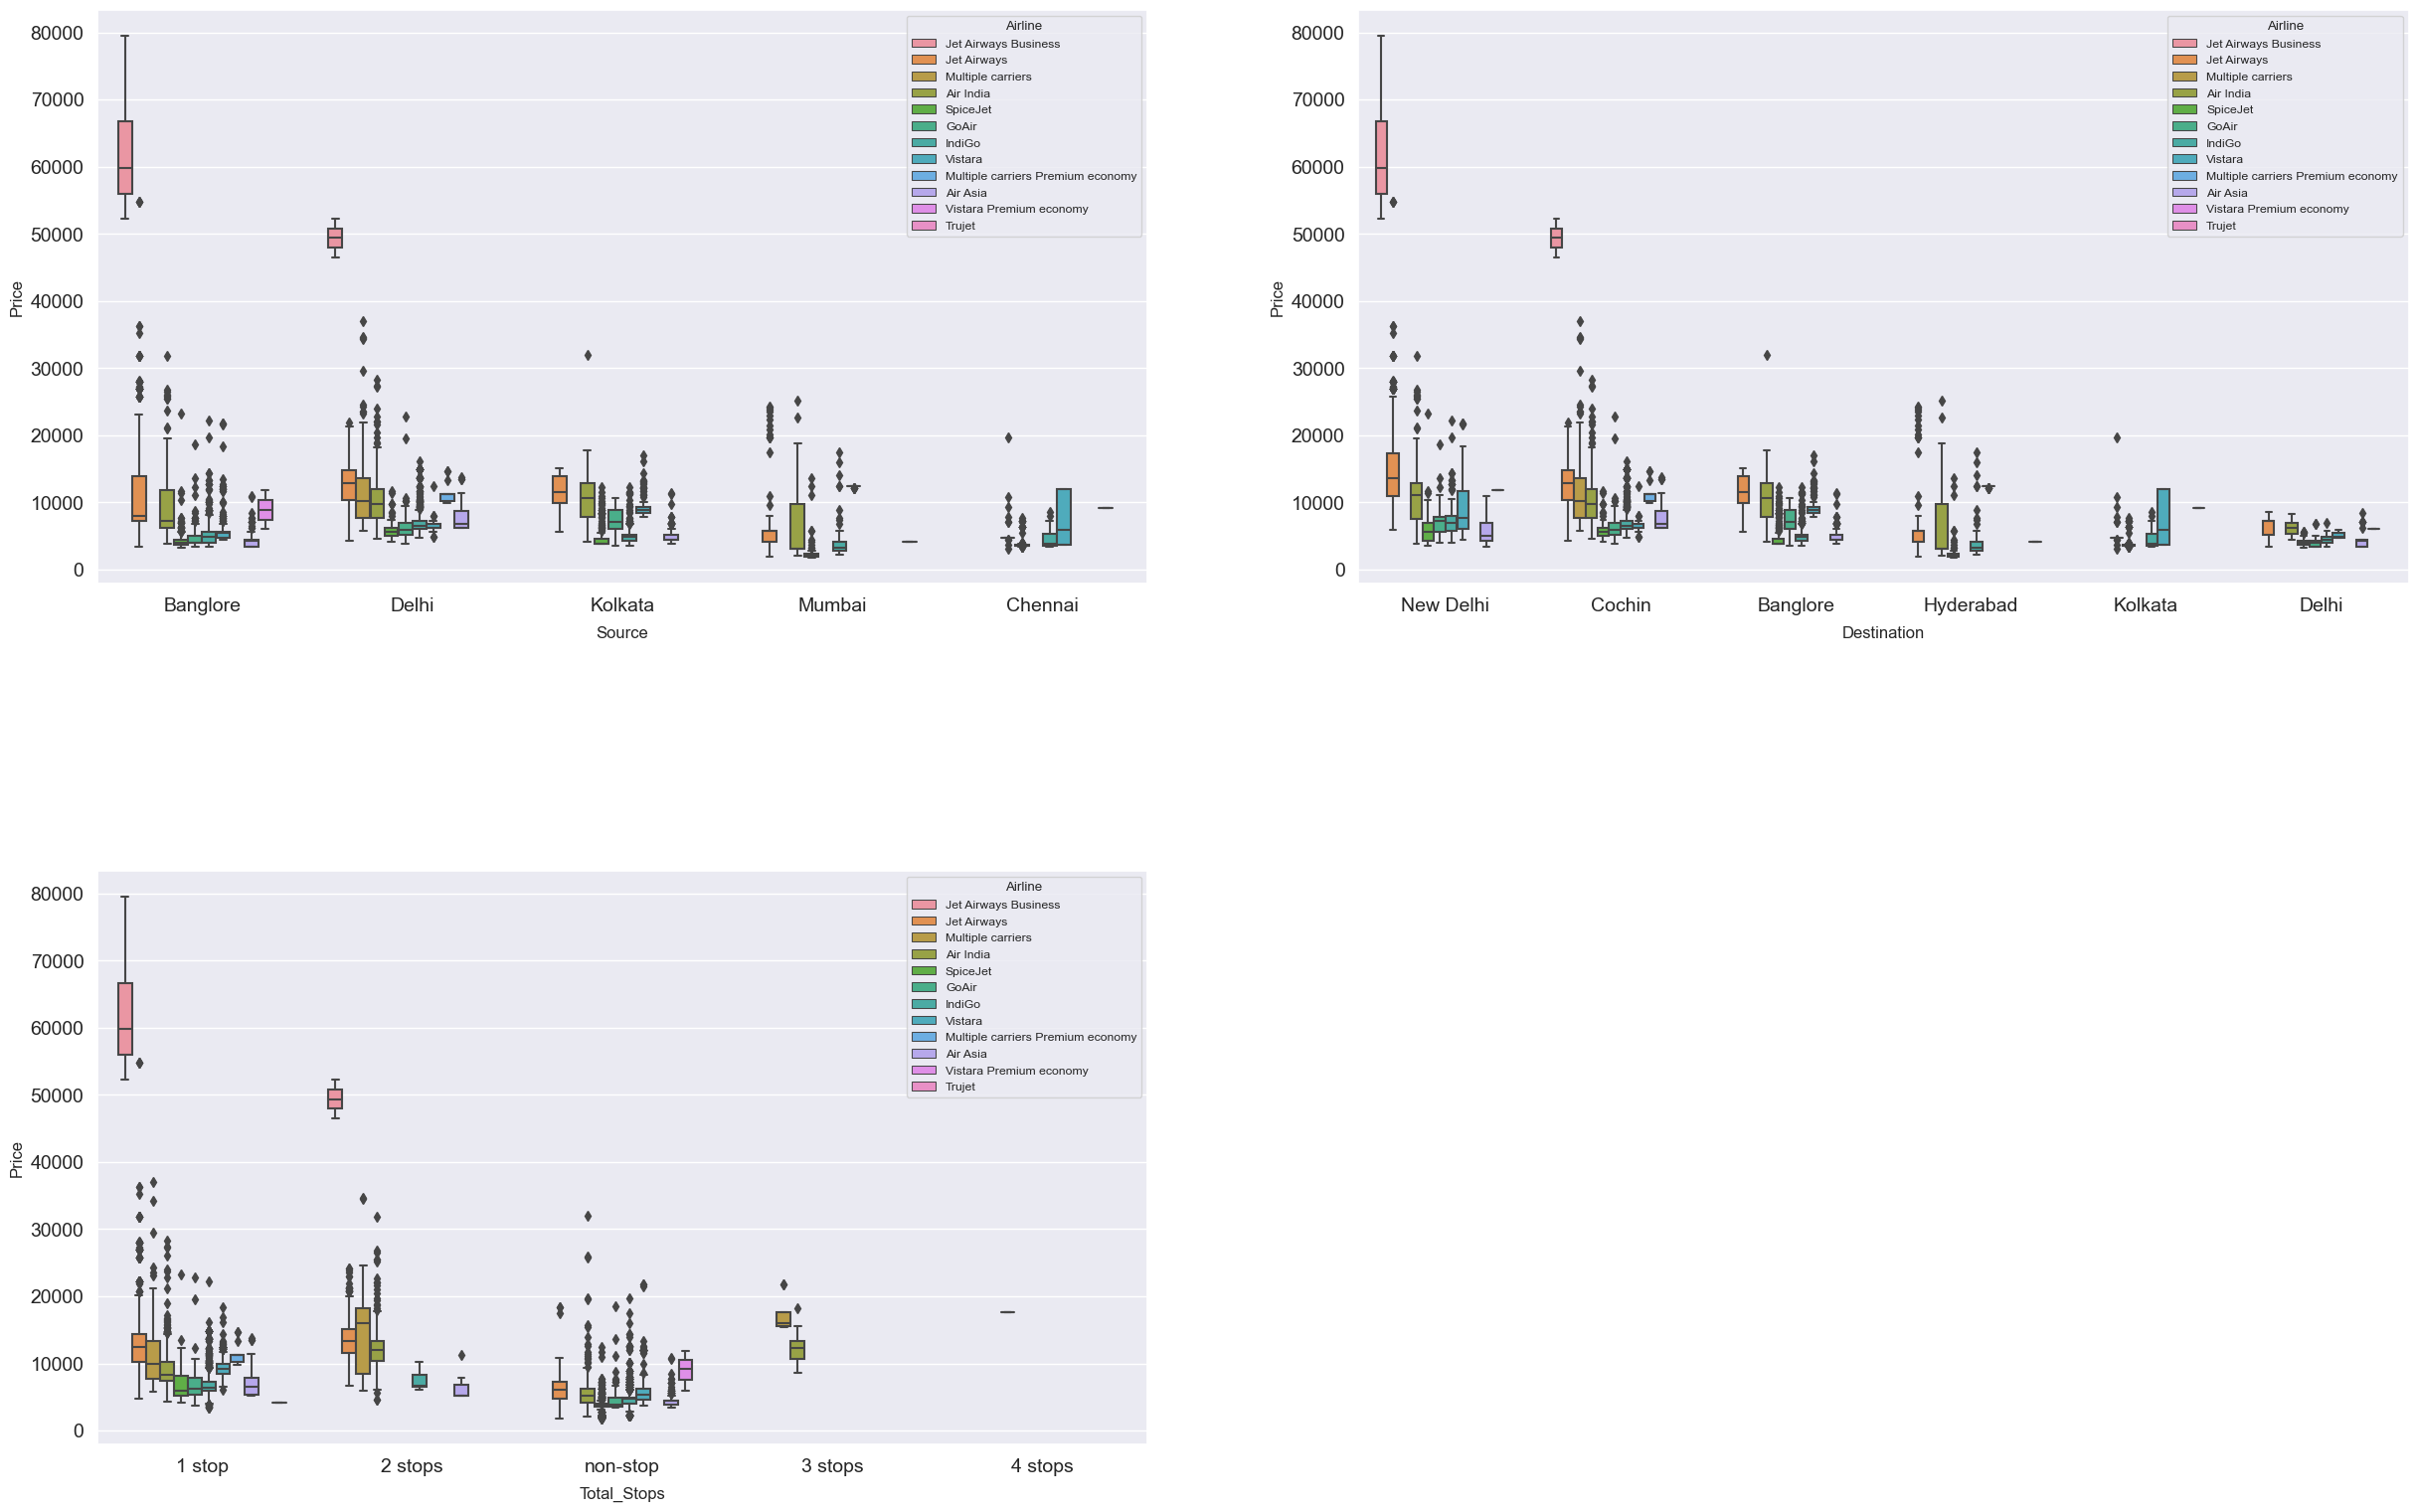

In [22]:
plt.figure(figsize=(30,30))
for i,col_name in enumerate(categorical_feature[1:4]):
    plt.subplot(len(categorical_feature[1:4]),2,i+1)
    sns.set(font_scale=0.8)
    sns.boxplot(data=train_df.sort_values('Price',ascending = False),x=col_name, y='Price',hue='Airline')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel(col_name,labelpad=8, fontsize=12)
    plt.ylabel('Price',fontsize=12)
plt.subplots_adjust(hspace=0.5)

In [23]:
train_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [24]:
train_df=pd.get_dummies(train_df,columns=categorical_feature[0:3], drop_first=True,dtype=int)

In [25]:
train_df.head(2)

,Total_Stops,Price,Date,Month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,non-stop,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,2 stops,7662,1,5,2019,13,15,5,50,7,...,0,0,0,1,0,0,0,0,0,0


In [26]:
train_df.columns

Index(['Total_Stops', 'Price', 'Date', 'Month', 'year', 'Arrival_hour',
       'Arrival_min', 'Dep_hour', 'Dep_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for feature in categorical_feature[3:4]:
    label_encoder.fit(train_df[feature])
    train_df[feature] = label_encoder.transform(train_df[feature])


In [28]:
train_df.head()

,Total_Stops,Price,Date,Month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,2019,13,15,5,50,7,...,0,0,0,1,0,0,0,0,0,0
2,1,13882,9,6,2019,4,25,9,25,19,...,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,2019,23,30,18,5,5,...,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,0,0,1


In [29]:
train_df.shape

(10682, 31)

In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int32
 1   Price                                      10682 non-null  int64
 2   Date                                       10682 non-null  int32
 3   Month                                      10682 non-null  int32
 4   year                                       10682 non-null  int32
 5   Arrival_hour                               10682 non-null  int32
 6   Arrival_min                                10682 non-null  int32
 7   Dep_hour                                   10682 non-null  int32
 8   Dep_min                                    10682 non-null  int32
 9   Duration_hours                             10682 non-null  int64
 10  Duration_mins                              10682 no

### Test Data

In [31]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [32]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


### Handling Numerical & Categorical Feature

In [33]:
test_df['Date']=test_df['Date_of_Journey'].str.split('/').str[0].astype(int)
test_df['Month']=test_df['Date_of_Journey'].str.split('/').str[1].astype(int)
test_df['year']=test_df['Date_of_Journey'].str.split('/').str[2].astype(int)

test_df['Arrival_hour']=pd.to_datetime(test_df['Arrival_Time']).dt.hour
test_df['Arrival_min']=pd.to_datetime(test_df['Arrival_Time']).dt.minute
test_df['Dep_hour']=pd.to_datetime(test_df['Dep_Time']).dt.hour
test_df['Dep_min']=pd.to_datetime(test_df['Dep_Time']).dt.minute


#assigning and converting duration columns into list
duration=list(test_df['Duration'])
         
for i in range(len(duration)):
    if len((duration[i]).split()) !=2:  ## check if the condition contains only hour or mins
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m "   ## add 0 mins
        else:
            duration[i]=" 0h "+ duration[i]   ## add 0 hours
            
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))    ## extract hours from duration
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))
    

test_df['Duration_hours']=duration_hours
test_df['Duration_mins']=duration_mins

test_df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019,4,25,17,30,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019,10,20,6,20,4,0


In [34]:
test_df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Duration','Route','Additional_Info'],axis=1, inplace=True)

In [35]:
categorical_feature=[feature for feature in test_df.columns if test_df[feature].dtype == 'O']

In [36]:
categorical_feature

['Airline', 'Source', 'Destination', 'Total_Stops']

In [37]:
test_df=pd.get_dummies(test_df,columns=categorical_feature[0:3], drop_first=True, dtype=int)

In [38]:
#Transformed test data
for feature in categorical_feature[3:4]:
    test_df[feature] = label_encoder.transform(test_df[feature])

In [39]:
test_df.head()

,Total_Stops,Date,Month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,6,6,2019,4,25,17,30,10,55,...,0,0,1,0,0,1,0,0,0,0
1,0,12,5,2019,10,20,6,20,4,0,...,0,0,0,1,0,0,0,0,0,0
2,0,21,5,2019,19,0,19,15,23,45,...,0,0,1,0,0,1,0,0,0,0
3,0,21,5,2019,21,0,8,0,13,0,...,0,0,1,0,0,1,0,0,0,0
4,4,24,6,2019,2,45,23,55,2,50,...,0,0,0,0,0,0,1,0,0,0


In [40]:
test_df.shape

(2671, 29)

In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                2671 non-null   int32
 1   Date                                       2671 non-null   int32
 2   Month                                      2671 non-null   int32
 3   year                                       2671 non-null   int32
 4   Arrival_hour                               2671 non-null   int32
 5   Arrival_min                                2671 non-null   int32
 6   Dep_hour                                   2671 non-null   int32
 7   Dep_min                                    2671 non-null   int32
 8   Duration_hours                             2671 non-null   int64
 9   Duration_mins                              2671 non-null   int64
 10  Airline_Air India                          2671 

### Split Train data into Dependent & Independent feature

In [42]:
## divide dependent and independent feature
X=train_df.drop(['Price'],axis=1)
y=train_df['Price']

In [43]:
X.head(2)

,Total_Stops,Date,Month,year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,24,3,2019,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,1,5,2019,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0


In [44]:
y.head(2)

0    3897
1    7662
Name: Price, dtype: int64

### Train-Test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.20,random_state=42)

### Feateure Selection

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X_train,y_train)

ExtraTreesRegressor()

<Axes: >

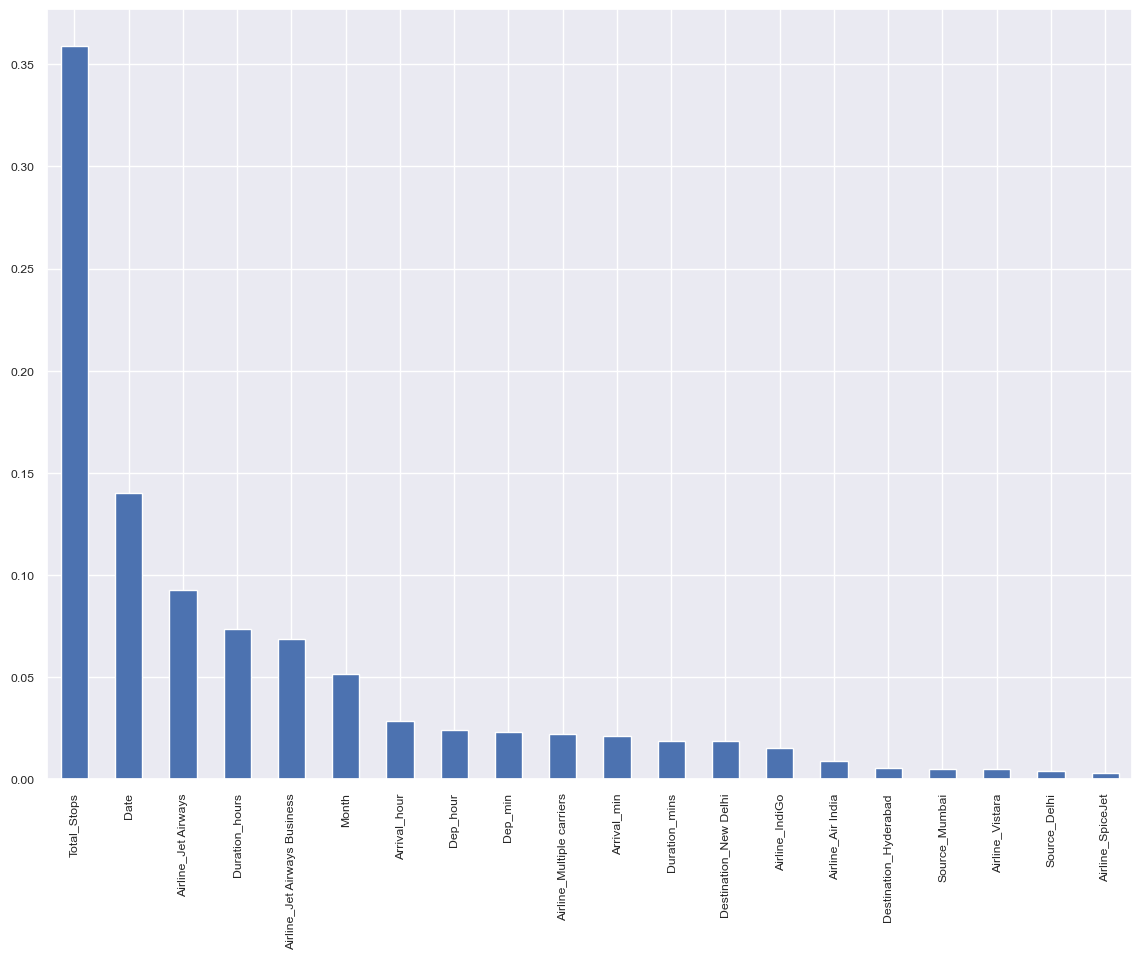

In [47]:
plt.figure(figsize=(14,10))
feat_importances=pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind="bar")

In [48]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=selection)
rfe.fit(X_train,y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

In [49]:
len(selected_features)

15

In [50]:
x_train=X_train[selected_features]
x_test=X_test[selected_features]

### Feature Scaling

In [51]:
#### feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Model Training

In [52]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

### Hyperparameter Tuning

In [55]:
linear_grid={'fit_intercept':[True]
             
}
random_grid={'n_estimators':[500,700],
             'max_features':['sqrt','log2'],
             'criterion':["squared_error", "absolute_error"],
             'max_depth':[10,15,20]}

tree_grid={'criterion':["squared_error", "absolute_error"],
           'max_features':['sqrt','log2'],
           'max_depth':[10, 15, 20],
           'min_samples_split': [2, 5, 10]
           
          }

knn_grid={'n_neighbors':[10, 15, 20,],
         'algorithm':['auto','ball_tree', 'kd_tree',],
          'weights': ['uniform', 'distance'],
         }

adaboost_grid = {
    'n_estimators': [600,800,1000],
    'learning_rate': [0.01, 0.1],
    'loss':['linear', 'square', 'exponential']
}

gradient_boost_grid = {
    'n_estimators': [300, 500],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
}

parameter={'LinearRegression':linear_grid,
            'DecisionTree':tree_grid,
            'RandomForest':random_grid,
            'KNeighbors':knn_grid,
            'AdaBoost':adaboost_grid,
            'GradientBoosting':gradient_boost_grid
        }
        
        
Regressor={'LinearRegression':LinearRegression(),
           'DecisionTree':DecisionTreeRegressor(),
           'KNeighbors':KNeighborsRegressor(),
           'AdaBoost':AdaBoostRegressor(),
           'GradientBoosting':GradientBoostingRegressor(),
           'RandomForest':RandomForestRegressor()
        }

LinearRegression
R2 Score: 0.5689767951953419
Mean Squared Error: 9293746.619018758
Mean Absolute Error: 2182.9895664389005

DecisionTree
R2 Score: 0.7038449840025822
Mean Squared Error: 6385711.135619355
Mean Absolute Error: 1521.8074685015154

KNeighbors
R2 Score: 0.7503747446515878
Mean Squared Error: 5382433.815755732
Mean Absolute Error: 1548.0708001871783

AdaBoost
R2 Score: 0.5343470283226961
Mean Squared Error: 10040435.60281934
Mean Absolute Error: 2330.827043346686

GradientBoosting
R2 Score: 0.8461119628648162
Mean Squared Error: 3318142.524323534
Mean Absolute Error: 1203.4897500395268

RandomForest
R2 Score: 0.8168084462105989
Mean Squared Error: 3949986.6009177812
Mean Absolute Error: 1284.3278966208338



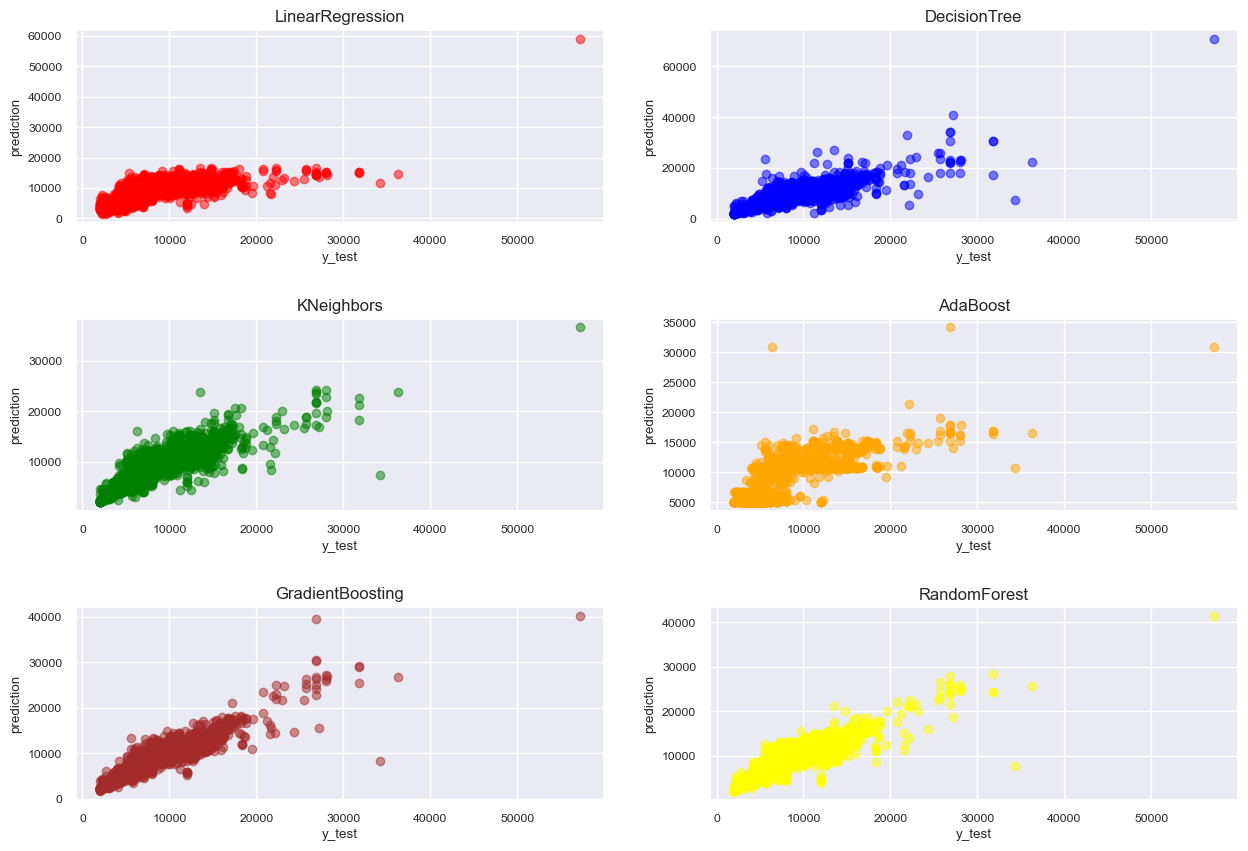

In [56]:
models_r2_score = {}
best_param = {}

plt.figure(figsize=(15, 10)) 
colors = ['red', 'blue', 'green', 'orange','brown', 'yellow']

# Assuming Regressor is a dictionary containing the regressor names as keys and the corresponding models as values
for idx, (regressor_name, regressor) in enumerate(Regressor.items(), 1):
    params = parameter[regressor_name]
    reg = RandomizedSearchCV(regressor, param_distributions=params, scoring='neg_mean_squared_error',
                             random_state=42, n_iter=5, cv=5, n_jobs=1)
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)

    # Print evaluation metrics for each regressor
    print(regressor_name)
    print("R2 Score:", r2_score(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("")
    models_r2_score.update({regressor_name: r2_score(y_test,y_pred)})
    best_param.update({regressor_name:reg.best_params_})

    # Create a separate scatter plot for each algorithm
    plt.subplot(3, 2, idx)
    plt.scatter(y_test, y_pred, alpha=0.5,c=colors[idx - 1])
    plt.xlabel('y_test')
    plt.ylabel('prediction')
    plt.title(regressor_name, fontsize=12)
    plt.subplots_adjust(hspace=0.5)

Text(0.5, 1.0, ' r2_score Comparison of different models')

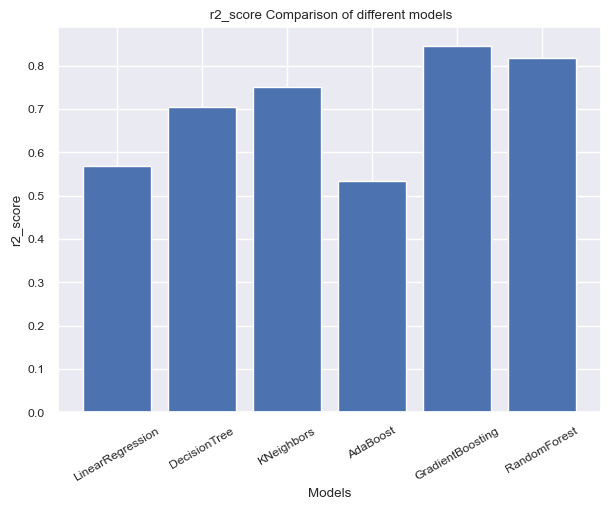

In [57]:
model_name=list(models_r2_score.keys())
model_accuracy=list(models_r2_score.values())
plt.figure(figsize=(7,5))
plt.bar(model_name,model_accuracy)
plt.xticks(rotation=30,ha='center')
plt.xlabel('Models')
plt.ylabel('r2_score')
plt.title(' r2_score Comparison of different models')

In [58]:
x=0
model_select=""
for i,j in models_r2_score.items():
    if (j>x):
        x=j
        model_select=i
        
model_select

'GradientBoosting'

### Model Building

In [59]:
for regressor_name, regressor in Regressor.items():
    if (regressor_name == model_select):
        params=parameter[regressor_name]
        selected_model = RandomizedSearchCV(regressor,param_distributions=params,scoring='neg_mean_squared_error', random_state=42, n_iter=5,cv=5,n_jobs=1)
        selected_model.fit( x_train,y_train)
        cv_scores = cross_val_score(selected_model.best_estimator_, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
        
        print("Cross-Validation Scores:")
        for fold, score in enumerate(cv_scores, start=1):
            print(f"Fold {fold}: {score:.4f}")
        
        y_pred=selected_model.predict(x_test)
        print(regressor_name)
        print("r2_score:",r2_score(y_test,y_pred))
        print("MSE:",mean_squared_error(y_test,y_pred))
        print("MAE:",mean_absolute_error(y_test,y_pred))

Cross-Validation Scores:
Fold 1: -2977062.4350
Fold 2: -4145792.0713
Fold 3: -4398500.4021
Fold 4: -5251419.4252
Fold 5: -3402610.3918
GradientBoosting
r2_score: 0.8452264569499295
MSE: 3337235.8527357
MAE: 1205.677630339648


### Prediction on Test dataset

In [60]:
test_prediction=selected_model.predict(test_df[selected_features])
test_prediction

array([13153.58992205,  9004.89601946, 14042.31428454, ...,
       13153.58992205, 13284.79914366, 11964.53245142])